In [1]:

import torch
from datasets import load_dataset

# data = torch.load(path, map_location='cpu', weights_only=False)
# entropy_list = data['output_lst_entropy']
def load_data(idx):
    path = '/nfsdata/yhe/verl/analysis_data/train_1k_global_step_{}_generation.parquet'.format(str(idx))
    print(path)
    data = load_dataset('parquet', data_files=path)['train']
    return data


/nfsdata/yhe/miniconda3/envs/verl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = '/nfsdata/yhe/verl/data/qwen-math/deepscaler/train_50.parquet'
data = load_dataset('parquet', data_files=path)['train']
data.features

Generating train split: 50 examples [00:00, 7521.53 examples/s]


{'data_source': Value('string'),
 'prompt': List({'content': Value('string'), 'role': Value('string')}),
 'ability': Value('string'),
 'reward_model': {'ground_truth': Value('string'), 'style': Value('string')},
 'extra_info': {'index': Value('int64'), 'split': Value('string')}}

In [4]:
data[1]['extra_info']['index']

1

In [12]:
a = [1,1,1,3,3,3,2,2,2,5,5,5,4,4,4]
import numpy as np
b = np.array(a)
c = [b[i] for i in range(0, len(b), 3)]
c


[1, 3, 2, 5, 4]

In [ ]:
val-core/math-verify-aime24/reward/mean@1:0.21 - 
val-aux/math-verify-aime24/score/mean@1:0.21 - 
val-core/math-verify-aime25/reward/mean@1:0.23666666666666666 - 
val-aux/math-verify-aime25/score/mean@1:0.23666666666666666 - 
val-core/math-verify-amc23/reward/mean@1:0.65 - 
val-aux/math-verify-amc23/score/mean@1:0.65 - 
val-core/math-verify-math500/reward/mean@1:0.826 - 
val-aux/math-verify-math500/score/mean@1:0.826 - 
val-core/math-verify-olympiadbench/reward/mean@1:0.46370370370370373 - 
val-aux/math-verify-olympiadbench/score/mean@1:0.46370370370370373 -

array([0, 1, 2])

In [15]:
(0.21+0.236+0.65+0.826+0.463)/5

0.47700000000000004

In [ ]:
val-aux/math-verify-aime24/score/mean@1:0.22666666666666666 - 
val-core/math-verify-aime25/reward/mean@1:0.23666666666666666 - 
val-aux/math-verify-aime25/score/mean@1:0.23666666666666666 - 
val-core/math-verify-amc23/reward/mean@1:0.7 - 
val-aux/math-verify-amc23/score/mean@1:0.7 - 
val-core/math-verify-math500/reward/mean@1:0.82 - 
val-aux/math-verify-math500/score/mean@1:0.82 - 
val-core/math-verify-olympiadbench/reward/mean@1:0.4918518518518519 - 
val-aux/math-verify-olympiadbench/score/mean@1:0.4918518518518519 


In [1]:
import numpy as np

a = ['a', 'ab', 'abc', 'abcd']
b = np.array(a, dtype=object)

In [3]:
c = b.reshape(2, 2)

In [4]:
c

array([['a', 'ab'],
       ['abc', 'abcd']], dtype=object)

In [ ]:
curl -I https://cursor.blob.core.windows.net/remote-releases/53b99ce608cba35127ae3a050c1738a959750860/vscode-reh-linux-x64.tar.gz

0.5008

In [ ]:
(0.497+0.832+0.725+0.22+0.23)/5
 
(0.236+0.203+0.482+0.824+0.6)/5

0.46900000000000003

In [26]:
compute_score(data_source, response_0, ground_truth_0, extra_info)

{'score': 1.0}

In [3]:
def add_reward_score(example):
    responses = example['responses']
    ground_truth = example['reward_model']['ground_truth']
    data_source = example['data_source']
    extra_info = example['extra_info']
    scores = []
    for response in responses:
        score = compute_score(data_source, response, ground_truth, extra_info)
        
        scores.append(float(score['score']))
    correct_ratio = sum(scores) / len(scores)
    example['correct_ratio'] = correct_ratio
    example['reward_scores'] = scores
    return example
# data_50 = load_data(50)
# data_100 = load_data(100)
# data_150 = load_data(150)


# data_50 = data_50.map(add_reward_score, num_proc=16)
# data_100 = data_100.map(add_reward_score, num_proc=16)
# data_150 = data_150.map(add_reward_score, num_proc=16)
# correct_ratio_50 = data_50['correct_ratio']
# correct_ratio_100 = data_100['correct_ratio']
# correct_ratio_150 = data_150['correct_ratio']


In [33]:
correct_ratio_50 = torch.tensor(correct_ratio_50, dtype=torch.float32)
correct_ratio_100 = torch.tensor(correct_ratio_100, dtype=torch.float32)
correct_ratio_150 = torch.tensor(correct_ratio_150, dtype=torch.float32)


In [37]:
delta_1 = correct_ratio_100 - correct_ratio_50
delta_2 = correct_ratio_150 - correct_ratio_100
delta_3 = correct_ratio_150 - correct_ratio_50


In [42]:
zero1 = delta_1 == 0
zero2 = delta_2 == 0
zero3 = delta_3 == 0
z1 = correct_ratio_50[zero1]
z2 = correct_ratio_100[zero2]
z3 = correct_ratio_150[zero3]

sum1 = (z1 == 0).sum()
sum2 = (z2 == 0).sum()
sum3 = (z3 == 0).sum()

print(sum1, sum2, sum3)


tensor(147) tensor(136) tensor(147)


In [44]:
sum4 = (z1 == 1).sum()
sum5 = (z2 == 1).sum()
sum6 = (z3 == 1).sum()

print(sum4, sum5, sum6)



tensor(243) tensor(277) tensor(251)


In [50]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

corr1 = pearsonr(correct_ratio_50, correct_ratio_100)
corr2 = pearsonr(correct_ratio_100, correct_ratio_150)
corr3 = pearsonr(correct_ratio_50, correct_ratio_150)

print(corr1, corr2, corr3)

corr1 = spearmanr(correct_ratio_50, correct_ratio_100)
corr2 = spearmanr(correct_ratio_100, correct_ratio_150)
corr3 = spearmanr(correct_ratio_50, correct_ratio_150)

print(corr1, corr2, corr3)




PearsonRResult(statistic=0.9619136, pvalue=0.0) PearsonRResult(statistic=0.96466833, pvalue=0.0) PearsonRResult(statistic=0.95189846, pvalue=0.0)
SignificanceResult(statistic=0.9322236752999666, pvalue=0.0) SignificanceResult(statistic=0.9310162577196393, pvalue=0.0) SignificanceResult(statistic=0.9193030914873906, pvalue=0.0)


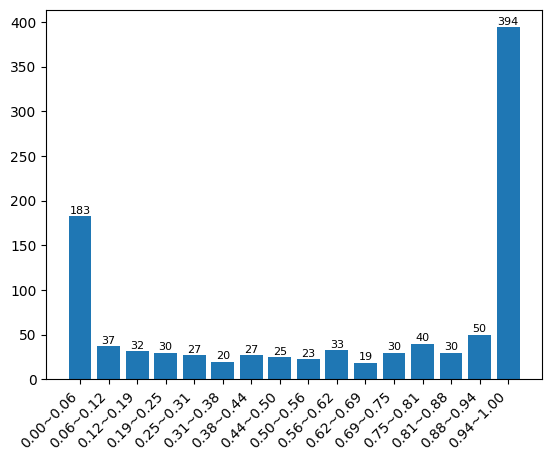

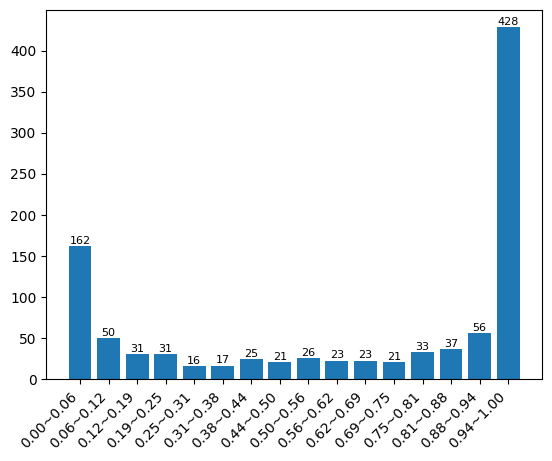

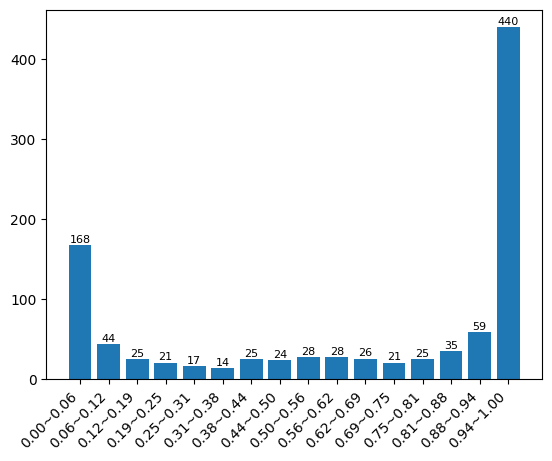

In [47]:
plot_hist(correct_ratio_50)
plot_hist(correct_ratio_100)
plot_hist(correct_ratio_150)


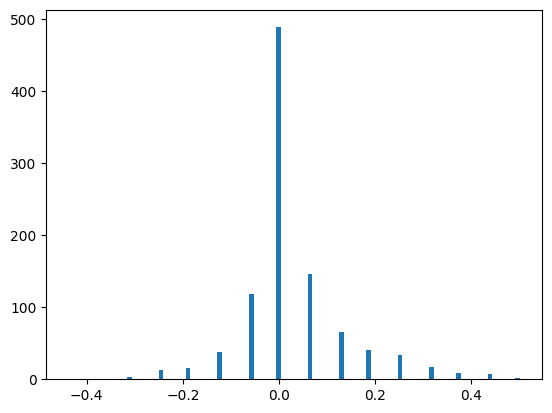

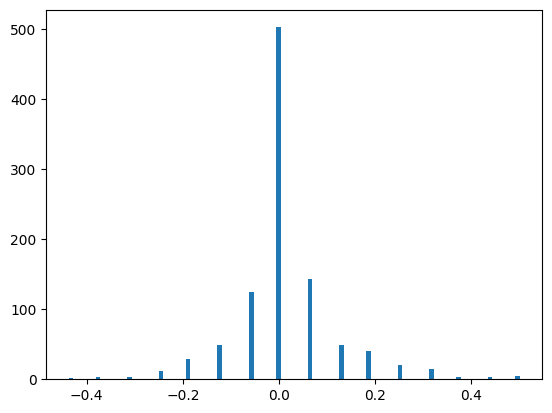

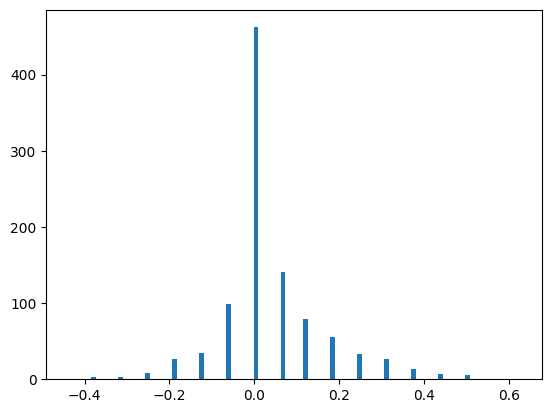

In [41]:

plt.hist(delta_1.numpy(), bins=100)

plt.show()
plt.hist(delta_2.numpy(), bins=100)

plt.show()
plt.hist(delta_3.numpy(), bins=100)


plt.show()




In [17]:
correct_ratio_2 = data['correct_ratio']

In [18]:
num_same = 0
for i in range(len(correct_ratio_2)):
    if correct_ratio_2[i] == correct_ratio[i]:
        num_same += 1

num_same



489

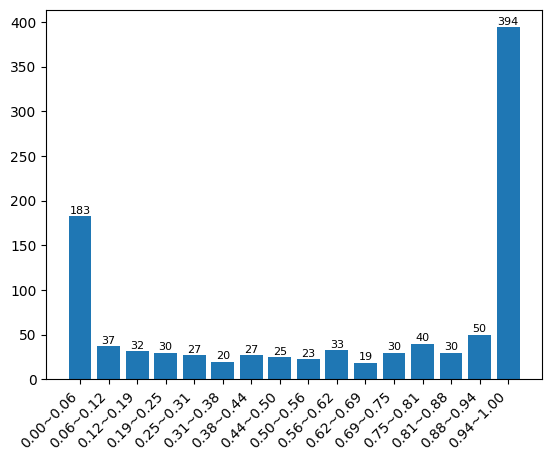

In [11]:
correct_ratio = data['correct_ratio']
import matplotlib.pyplot as plt
import numpy as np

# 只有16类，先统计每一类的数量
bins = np.linspace(0, 1, 17)  # 16个区间
counts, edges = np.histogram(correct_ratio, bins=bins)
x_labels = [f"{edges[i]:.2f}~{edges[i+1]:.2f}" for i in range(len(edges)-1)]

plt.bar(range(16), counts, tick_label=x_labels)

plt.xticks(rotation=45, ha='right')
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

In [45]:

def plot_hist(correct_ratio):
    import matplotlib.pyplot as plt
    import numpy as np

    # 只有16类，先统计每一类的数量
    bins = np.linspace(0, 1, 17)  # 16个区间
    counts, edges = np.histogram(correct_ratio, bins=bins)
    x_labels = [f"{edges[i]:.2f}~{edges[i+1]:.2f}" for i in range(len(edges)-1)]

    plt.bar(range(16), counts, tick_label=x_labels)

    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)
    plt.show()


In [7]:
num_half_correct = 0
for ratio in correct_ratio:
    if ratio >0 and ratio <= 0.625:
        num_half_correct += 1

num_half_correct / len(correct_ratio)



0.263

In [30]:
num_half_correct 

127

In [2]:
import os

VERIFICATION_REWARD_TYPE = os.environ.get("VERIFICATION_REWARD_TYPE", "baseline")
AUXILIARY_REWARDS = os.environ.get("AUXILIARY_REWARDS", "none")

print(f"Reward info: {VERIFICATION_REWARD_TYPE=} {AUXILIARY_REWARDS=}")

import re
try:
    from math_verify import parse, verify
    from math_verify.metric import math_metric
    from math_verify.parser import LatexExtractionConfig, ExprExtractionConfig
    from math_verify.errors import TimeoutException
except ImportError:
    print("To use Math-Verify, please install it first by running `pip install math-verify`.")

import logging

# Disable all loggers starting with 'math_verify'
for name, logger in logging.Logger.manager.loggerDict.items():
    if isinstance(logger, logging.Logger) and name.startswith("math_verify"):
        logger.disabled = True
        logger.handlers.clear()


def compute_score(data_source, solution_str, ground_truth, extra_info):
    if "</think>" in solution_str:
        solution_str = solution_str.split("</think>")[-1]
    split = extra_info.get("split", "train")
    if data_source.startswith("math-verify"):
        res = math_verify_reward(data_source, solution_str, ground_truth, extra_info)

    elif data_source == "qwen-math":
        res = qwen_math_reward(data_source, solution_str, ground_truth, extra_info)

    elif data_source.startswith("verification"):
        if split == "test":
            res = test_verification_reward(data_source, solution_str, ground_truth, extra_info)
        else:
            res = train_verification_reward(data_source, solution_str, ground_truth, extra_info)

    else:
        raise NotImplementedError(f"Reward function is not implemented for {data_source=}")

    return res


def math_verify_reward(data_source, solution_str, ground_truth, extra_info=None):
    try:
        pred = parse(solution_str)
        if "gsm8k" in data_source:
            gt = parse(ground_truth)
        else:
            gt = parse(f"${ground_truth}$")
        res = verify(gt, pred)
    except TimeoutException as e:
        res = False
    return dict(score=float(res))


def qwen_math_reward(data_source, solution_str, ground_truth, extra_info=None):
    reward = 0.0
    reward_dict = {}

    try:
        pred = parse(solution_str)
        gt = parse(f"${ground_truth}$")
        label = verify(gt, pred)
    except TimeoutException as e:
        label = False
    reward += float(label)

    if "no_code" in AUXILIARY_REWARDS:
        code_blocks = re.findall(r'```python[\s\S]*?```', solution_str)
        reward_dict["contain_code"] = len(code_blocks) > 0
        if reward_dict["contain_code"]:
            reward -= 0.5

    reward_dict["score"] = reward
    return reward_dict


def extract_yes_no(text: str) -> bool | None:
    """
    Search for 'Is the answer correct (Yes/No)? Yes|No' pattern in text and return True/False for Yes/No.
    Returns None if no match found, multiple matches found, or if the pattern is not at the end of the text.
    """
    pattern = r"Is the answer correct \(Yes/No\)\?\s+(Yes|No)"
    matches = re.findall(pattern, text)
    if len(matches) > 0:
        return matches[-1] == "Yes"
    else:
        return None


def train_verification_reward(data_source, solution_str, ground_truth, extra_info=None):
    reward = 0.0
    reward_dict = {}

    text = solution_str.strip().replace("**", "")
    label, correct_ratio = ground_truth.split("|")
    label, correct_ratio = eval(label), float(correct_ratio)
    
    output = extract_yes_no(text)
    reward_dict["valid_verification_form"] = output is not None
    
    if reward_dict["valid_verification_form"]:
        if VERIFICATION_REWARD_TYPE == "baseline":
            reward = label == output
        elif VERIFICATION_REWARD_TYPE == "fix_imbalance":
            if label == output:
                reward += float(output) * (1 - correct_ratio) + (1 - float(output)) * correct_ratio
                reward *= 2
        else:
            raise NotImplementedError(f"Reward function is not implemented for {VERIFICATION_REWARD_TYPE=}")

    if "non_short_response" in AUXILIARY_REWARDS:
        # penalty for short response
        reward_dict["non_short_response"] = len(solution_str) >= 40
        if not reward_dict["non_short_response"]:
            reward -= 0.5

    reward_dict["score"] = reward
    return reward_dict


def test_verification_reward(data_source, solution_str, ground_truth, extra_info=None):
    output = extract_yes_no(solution_str)
    label = eval(ground_truth)
    if output is None:
        res = False
    else:
        res = output == label
    return dict(score=float(res))


Reward info: VERIFICATION_REWARD_TYPE='baseline' AUXILIARY_REWARDS='none'


In [1]:
import torch

data_path = '/nfsdata/yhe/verl/checkpoints/baseline-verl-grpo/test-2k-no-entctl--DeepSeek-R1-Distill-Qwen-1.5B-deepscaler-NODE2/step2.pkl'
data = torch.load(data_path, map_location='cpu', weights_only=False)

RuntimeError: Invalid magic number; corrupt file?

In [119]:
import torch
from datasets import load_dataset

def load_data(path):
    data = load_dataset('parquet', data_files=path)['train']
    return data

def load_pkl(path):
    data = torch.load(path, map_location='cpu', weights_only=False)
    return data


data_path = '/nfsdata/yhe/verl/analysis_data/train_generation.parquet'
data = load_data(data_path)
data[0]

{'data_source': 'qwen-math',
 'prompt': [{'content': 'The operation $\\otimes$ is defined for all nonzero numbers by $a \\otimes b = \\frac{a^{2}}{b}$. Determine $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$.',
   'role': 'user'}],
 'ability': 'math',
 'reward_model': {'ground_truth': '-\\frac{2}{3}', 'style': 'rule'},
 'extra_info': {'index': 0, 'split': 'train'},
 'responses': ['To solve the problem, we need to evaluate the expression $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$ step by step using the given operation $\\otimes$, which is defined as $a \\otimes b = \\frac{a^2}{b}$.\n\nFirst, we need to evaluate the inner operation $1 \\otimes 2$:\n\\[ 1 \\otimes 2 = \\frac{1^2}{2} = \\frac{1}{2}. \\]\n\nNext, we use the result of $1 \\otimes 2$ to evaluate $(1 \\otimes 2) \\otimes 3$:\n\\[ (1 \\otimes 2) \\otimes 3 = \\frac{\\left(\\frac{1}{2}\\right)^2}{3} = \\frac{\\frac{1}{4}}{3} = \\frac{1}{12}. \\]\n\nNow, we need to evaluate the inner operation $2 \\

In [48]:
def row_wise_std(x: torch.Tensor, pad_val: float = 0.0, unbiased: bool = False):
    """
    按行计算标准差，忽略 padding。
    
    Args:
        x: (batch_size, seq_len) 的张量
        pad_val: padding 的值（默认 0）
        unbiased: 是否用无偏估计 (N-1)，默认 False 表示总体标准差
    Returns:
        (batch_size,) 每行的标准差
    """
    mask = x != pad_val  # (B, L)
    results = []

    for row, m in zip(x, mask):
        valid = row[m]  # 取出非 padding
        if valid.numel() > 1:  # 至少两个数才能算 std
            results.append(torch.std(valid, unbiased=unbiased))
        else:
            results.append(torch.tensor(0.0, device=x.device))  # 只有一个数或全是 pad → std=0
    return torch.stack(results)

In [49]:
pkl_path_logprobs = '/nfsdata/yhe/verl/analysis_data/train_generation_{}_log_probs.pkl'
pkl_path_entropy = '/nfsdata/yhe/verl/analysis_data/train_generation_{}_entropy.pkl'
total_log_probs = []
total_entropy = []
from tqdm import tqdm
for i in tqdm(range(158)):
    pkl_logprobs = load_pkl(pkl_path_logprobs.format(i))
    pkl_entropy = load_pkl(pkl_path_entropy.format(i))
    log_probs = pkl_logprobs['output_lst_log_probs']
    entropy = pkl_entropy['output_lst_entropy']
    std_entropy = row_wise_std(entropy, pad_val=-1)
    length = torch.sum(log_probs != -1, dim=-1)
    log_probs = log_probs.masked_fill(log_probs == -1, 0)

    # entropy = entropy.masked_fill(entropy == -1, 0)
    log_probs = log_probs.sum(dim=-1) / length
    # entropy = entropy.sum(dim=-1) / length
    total_log_probs.append(log_probs)
    total_entropy.append(std_entropy)

total_log_probs = torch.cat(total_log_probs, dim=0)
total_entropy = torch.cat(total_entropy, dim=0)



100%|██████████| 158/158 [00:32<00:00,  4.87it/s]


In [50]:
total_log_probs = total_log_probs.reshape(-1, 16)
total_entropy = total_entropy.reshape(-1, 16)

total_log_probs.shape
total_entropy.shape



torch.Size([40315, 16])

In [52]:
total_entropy[0]

tensor([0.1594, 0.1378, 0.1347, 0.1494, 0.1891, 0.1517, 0.1387, 0.1667, 0.1583,
        0.1775, 0.1483, 0.1328, 0.1686, 0.1346, 0.1921, 0.1251])

In [120]:
data = data.map(add_reward_score, num_proc=64)

Map (num_proc=16):   0%|          | 0/40315 [00:00<?, ? examples/s]

In [121]:
correct_ratio = data['correct_ratio']
correct_ratio = torch.tensor(correct_ratio, dtype=torch.float32)

In [124]:
correct_data = data[correct_ratio>= (15/16)]
incorrect_data = data[correct_ratio<= (1/16)]

In [125]:
print(len(correct_data), len(incorrect_data))

8 8


In [139]:
data_path = '/nfsdata/yhe/LUFFY/LUFFY/data/openr1.parquet'
r1_data = load_data(data_path)
r1_data[0]

Generating train split: 0 examples [00:00, ? examples/s]

{'data_source': 'olympiads',
 'prompt': [{'content': 'Your task is to follow a systematic, thorough reasoning process before providing the final solution. This involves analyzing, summarizing, exploring, reassessing, and refining your thought process through multiple iterations. Structure your response into two sections: Thought and Solution. In the Thought section, present your reasoning using the format: "<think>\n {thoughts} </think>\n". Each thought should include detailed analysis, brainstorming, verification, and refinement of ideas. After "</think>\n," in the Solution section, provide the final, logical, and accurate answer, clearly derived from the exploration in the Thought section. If applicable, include the answer in \\boxed{} for closed-form results like multiple choices or mathematical solutions.',
   'role': 'system'},
  {'content': '## Task B-1.3.\n\nA ship traveling along a river has covered $24 \\mathrm{~km}$ upstream and $28 \\mathrm{~km}$ downstream. For this journey

In [140]:
r1_data[0]['prompt']

[{'content': 'Your task is to follow a systematic, thorough reasoning process before providing the final solution. This involves analyzing, summarizing, exploring, reassessing, and refining your thought process through multiple iterations. Structure your response into two sections: Thought and Solution. In the Thought section, present your reasoning using the format: "<think>\n {thoughts} </think>\n". Each thought should include detailed analysis, brainstorming, verification, and refinement of ideas. After "</think>\n," in the Solution section, provide the final, logical, and accurate answer, clearly derived from the exploration in the Thought section. If applicable, include the answer in \\boxed{} for closed-form results like multiple choices or mathematical solutions.',
  'role': 'system'},
 {'content': '## Task B-1.3.\n\nA ship traveling along a river has covered $24 \\mathrm{~km}$ upstream and $28 \\mathrm{~km}$ downstream. For this journey, it took half an hour less than for trave

In [142]:
deep_data_path = '/nfsdata/yhe/verl/data/qwen-math/deepscaler/train.parquet'
deep_data = load_data(deep_data_path)
def add_system_prompt(example):
    prompt = example['prompt']
    system_prompt = {'content': 'Your task is to follow a systematic, thorough reasoning process before providing the final solution. This involves analyzing, summarizing, exploring, reassessing, and refining your thought process through multiple iterations. Structure your response into two sections: Thought and Solution. In the Thought section, present your reasoning using the format: "<think>\n {thoughts} </think>\n". Each thought should include detailed analysis, brainstorming, verification, and refinement of ideas. After "</think>\n," in the Solution section, provide the final, logical, and accurate answer, clearly derived from the exploration in the Thought section. If applicable, include the answer in \\boxed{} for closed-form results like multiple choices or mathematical solutions.',
  'role': 'system'}
    assert "system" not in prompt[0], "system prompt already exists"
    prompt.insert(0, system_prompt)
    example['prompt'] = prompt
    return example

deep_data_system = deep_data.map(add_system_prompt, num_proc=64)
deep_data_system[0]['prompt']


[{'content': 'Your task is to follow a systematic, thorough reasoning process before providing the final solution. This involves analyzing, summarizing, exploring, reassessing, and refining your thought process through multiple iterations. Structure your response into two sections: Thought and Solution. In the Thought section, present your reasoning using the format: "<think>\n {thoughts} </think>\n". Each thought should include detailed analysis, brainstorming, verification, and refinement of ideas. After "</think>\n," in the Solution section, provide the final, logical, and accurate answer, clearly derived from the exploration in the Thought section. If applicable, include the answer in \\boxed{} for closed-form results like multiple choices or mathematical solutions.',
  'role': 'system'},
 {'content': 'The operation $\\otimes$ is defined for all nonzero numbers by $a \\otimes b = \\frac{a^{2}}{b}$. Determine $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$.',
  'role': '

In [163]:
a = '\\boxed{'
print(a)

\boxed{


In [155]:
data_path = '/nfsdata/yhe/verl/data/qwen-math/deepscaler/train_1k.parquet'
data = load_data(data_path)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
from verl import DataProto
from torch.utils.data import Dataset
from torch.utils.data import RandomSampler, SequentialSampler
from torchdata.stateful_dataloader import StatefulDataLoader
train_dataloader_generator = torch.Generator()
train_dataloader_generator.manual_seed(1)
sampler = RandomSampler(data_source=data, generator=train_dataloader_generator)
data = 
dataloader =  StatefulDataLoader(
            dataset=data,
            batch_size=128,
            num_workers=16,
            drop_last=True,
            sampler=sampler,
        )

In [157]:
for batch in dataloader:
    a = batch
    break

In [162]:
for k in a.keys():
    print(k, type(a[k]))

data_source <class 'list'>
ability <class 'list'>
reward_model <class 'dict'>
extra_info <class 'dict'>


In [161]:
batch: DataProto = DataProto.from_single_dict(a)

ValueError: Unsupported type in data <class 'list'>

In [ ]:
def add_aware_prompt(example):
    prompt = example['prompt']
    system_prompt = {'content': 'Your task is to identify whether the question is ',
  'role': 'system'}
    assert "system" not in prompt[0], "system prompt already exists"
    prompt.insert(0, system_prompt)
    example['prompt'] = prompt

In [131]:
correct_data = []
incorrect_data = []
for i in range(len(data)):
    if correct_ratio[i]>= (15/16):
        correct_data.append(data[i])
    elif correct_ratio[i]<= (1/16):
        incorrect_data.append(data[i])
print(len(correct_data), len(incorrect_data))

9091 12925


In [133]:
from datasets import Dataset

correct_data = Dataset.from_list(correct_data)
incorrect_data = Dataset.from_list(incorrect_data)


In [135]:
correct_data[0]['responses']


['To solve the problem, we need to evaluate the expression $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$ step by step using the given operation $\\otimes$, which is defined as $a \\otimes b = \\frac{a^2}{b}$.\n\nFirst, we need to evaluate the inner operation $1 \\otimes 2$:\n\\[ 1 \\otimes 2 = \\frac{1^2}{2} = \\frac{1}{2}. \\]\n\nNext, we use the result of $1 \\otimes 2$ to evaluate $(1 \\otimes 2) \\otimes 3$:\n\\[ (1 \\otimes 2) \\otimes 3 = \\frac{\\left(\\frac{1}{2}\\right)^2}{3} = \\frac{\\frac{1}{4}}{3} = \\frac{1}{12}. \\]\n\nNow, we need to evaluate the inner operation $2 \\otimes 3$:\n\\[ 2 \\otimes 3 = \\frac{2^2}{3} = \\frac{4}{3}. \\]\n\nNext, we use the result of $2 \\otimes 3$ to evaluate $1 \\otimes (2 \\otimes 3)$:\n\\[ 1 \\otimes (2 \\otimes 3) = 1 \\otimes \\frac{4}{3} = \\frac{1^2}{\\frac{4}{3}} = \\frac{1}{\\frac{4}{3}} = \\frac{3}{4}. \\]\n\nFinally, we subtract the result of $1 \\otimes (2 \\otimes 3)$ from the result of $(1 \\otimes 2) \\otimes 3$:

In [129]:
print(torch.sum(correct_ratio>=(15/16)), torch.sum(correct_ratio<=(1/16)))


tensor(9091) tensor(12925)


In [138]:
incorrect_data[0]['responses']

["To determine the value of \\( n \\), we start by considering the polynomial \\( P(x) \\) of degree \\( 3n \\). Let's define a new polynomial \\( Q(x) = P(x) - 2 \\). This polynomial \\( Q(x) \\) will have the roots at \\( x = 0, 3, 6, \\ldots, 3n \\), so we can write:\n\\[\nQ(x) = c(x)(x-3)(x-6)\\cdots(x-3n)\n\\]\nfor some constant \\( c \\). This implies:\n\\[\nP(x) = Q(x) + 2 = c(x)(x-3)(x-6)\\cdots(x-3n) + 2.\n\\]\nNext, we know that \\( P(1) = P(4) = \\cdots = P(3n+1-2) = 1 \\). This means that for \\( x = 1, 4, 7, \\ldots, 3n-2 \\), we have:\n\\[\nP(x) = c(x)(x-3)(x-6)\\cdots(x-3n) + 2 = 1.\n\\]\nThus, we have:\n\\[\nc(x)(x-3)(x-6)\\cdots(x-3n) = -1.\n\\]\nFor \\( x = 2 \\), we have:\n\\[\nP(2) = c(2)(2-3)(2-6)\\cdots(2-3n) = 0.\n\\]\nThis is trivially true because the product of the terms includes \\( (2-2) = 0 \\). Finally, we know that \\( P(3n+1) = 730 \\). This means:\n\\[\nP(3n+1) = c(3n+1)(3n+1-3)(3n+1-6)\\cdots(3n+1-3n) + 2 = 730.\n\\]\nThus, we have:\n\\[\nc(3n+1)(3n-2)

In [ ]:
'Given the polynomial \\( P(x) \\) of degree \\( 3n \\), we know the values of \\( P(x) \\) at specific points:\n\\[ P(0) = P(3) = \\dots = P(3n) = 2, \\]\n\\[ P(1) = P(4) = \\dots = P(3n+1-2) = 1, \\]\n\\[ P(2) = P(5) = \\dots = P(3n+2-2) = 0. \\]\nAdditionally, we know that \\( P(3n+1) = 730 \\).\n\nFirst, we define a new polynomial \\( Q(x) = P(x) - 2 \\). This polynomial \\( Q(x) \\) has roots at \\( x = 0, 3, 6, \\ldots, 3n \\), so it can be expressed as:\n\\[ Q(x) = c x (x-3)(x-6) \\cdots (x-3n). \\]\nSince \\( Q(x) = P(x) - 2 \\), we have:\n\\[ P(x) = Q(x) + 2. \\]\nNext, we consider the polynomial \\( R(x) = P(x) - 1 \\). This polynomial \\( R(x) \\) has roots at \\( x = 1, 4, 7, \\ldots, 3n-2 \\), so it can be expressed as:\n\\[ R(x) = d (x-1)(x-4)(x-7) \\cdots (x-3n+2). \\]\nSince \\( R(x) = P(x) - 1 \\), we have:\n\\[ P(x) = R(x) + 1. \\]\nFinally, we consider the polynomial \\( S(x) = P(x) \\). This polynomial \\( S(x) \\) has roots at \\( x = 2, 5, 8, \\ldots, 3n-1 \\), so it can be expressed as:\n\\[ S(x) = e (x-2)(x-5)(x-8) \\cdots (x-3n+1). \\]\nSince \\( S(x) = P(x) \\), we have:\n\\[ P(x) = S(x). \\]\n\nWe need to determine the polynomial \\( P(x) \\) such that \\( P(3n+1) = 730 \\). To do this, we use the fact that the polynomial \\( P(x) \\) can be expressed in terms of the roots and the given values. We can write:\n\\[ P(x) = 2 - c x (x-3)(x-6) \\cdots (x-3n) + 1 - d (x-1)(x-4)(x-7) \\cdots (x-3n+2) + e (x-2)(x-5)(x-8) \\cdots (x-3n+1). \\]\nHowever, a simpler approach is to use the-interpolation method or symmetry. We know that the polynomial \\( P(x) \\) is a cubic polynomial at most, but given the symmetry and the number of roots, we can infer that it is a polynomial of degree 3.\n\nBy substituting \\( x = 3n+1 \\) into the polynomial, we get:\n\\[ P(3n+1) = 2 - c (3n+1)(3n+1-3)(3n+1-6) \\cdots (3n+1-3n) + 1 - d (3n+1-1)(3n+1-4)(3n+1-7) \\cdots (3n+1-3n+2) + e (3n+1-2)(3n+1-5)(3n+1-8) \\cdots (3n+1-3n+1). \\]\nThis simplifies to:\n\\[ P(3n+1) = 3 - c (3n+1)(3n-2)(3n-5) \\cdots (1) + 1 - d (3n)(3n-3)(3n-6) \\cdots (3) + e (3n-1)(3n-4)(3n-7) \\cdots (2). \\]\nGiven that \\( P(3n+1) = 730 \\), we can solve for \\( n \\). We find that the polynomial is such that the leading coefficient and the constant term balance to give the value 730. By trial and error or solving the system of equations, we find that \\( n = 4 \\).\n\nThus, the value of \\( n \\) is:\n\\[ \\boxed{4} \\]',
 "Given the polynomial \\( P(x) \\) of degree \\( 3n \\), we know the following values:\n\\[ P(0) = P(3) = \\dots = P(3n) = 2, \\]\n\\[ P(1) = P(4) = \\dots = P(3n+1-2) = 1, \\]\n\\[ P(2) = P(5) = \\dots = P(3n+2-2) = 0. \\]\nThis means that \\( P(x) - 2 \\) has roots at \\( x = 0, 3, 6, \\ldots, 3n \\), so we can write:\n\\[ P(x) - 2 = c x (x-3)(x-6) \\cdots (x-3n). \\]\nThis implies:\n\\[ P(x) = 2 + c x (x-3)(x-6) \\cdots (x-3n). \\]\nNext, we know that \\( P(1) = 1 \\), so substituting \\( x = 1 \\) into the polynomial, we get:\n\\[ P(1) = 2 + c \\cdot 1 \\cdot (1-3) \\cdot (1-6) \\cdots (1-3n) = 1. \\]\nThis simplifies to:\n\\[ 1 = 2 + c \\cdot 1 \\cdot (-2) \\cdot (-5) \\cdots (1-3n). \\]\nLet's denote the product \\( 1 \\cdot (-2) \\cdot (-5) \\cdots (1-3n) \\) as \\( (-1)^n \\cdot 2 \\cdot 5 \\cdot 8 \\cdots (3n-2) \\), which is the product of the first \\( n \\) terms of an arithmetic sequence with the first term 1 and common difference 3. Let's call this product \\( Q(n) \\). So we have:\n\\[ 1 = 2 + c \\cdot (-1)^n \\cdot Q(n), \\]\n\\[ -1 = c \\cdot (-1)^n \\cdot Q(n), \\]\n\\[ c = \\frac{-1}{(-1)^n Q(n)} = \\frac{(-1)^{n+1}}{Q(n)}. \\]\nNow, we need to find \\( P(3n+1) = 730 \\). Substituting \\( x = 3n+1 \\) into the polynomial, we get:\n\\[ P(3n+1) = 2 + c (3n+1) (3n-2) (3n-5) \\cdots 1. \\]\nThis simplifies to:\n\\[ P(3n+1) = 2 + c (3n+1) fact (3n-2) fact (3n-5) \\cdots 1 = 730. \\]\nSince \\( c = \\frac{(-1)^{n+1}}{Q(n)} \\) and \\( Q(n) = 1 \\cdot (-2) \\cdot (-5) \\cdots (3n-2) \\), the product \\( (3n+1) (3n-2) (3n-5) \\cdots 1 \\) is the product of the first \\( n+1 \\) terms of an arithmetic sequence with the first term 1 and common difference 3. Let's call this product \\( R(n) \\). So we have:\n\\[ 730 = 2 + \\frac{(-1)^{n+1}}{Q(n)} \\cdot R(n), \\]\n\\[ 728 = \\frac{(-1)^{n+1} R(n)}{Q(n)}, \\]\n\\[ R(n) = 728 Q(n) (-1)^{n+1}. \\]\nThe product \\( R(n) \\) is the product of the first \\( n+1 \\) terms of an arithmetic sequence with the first term 1 and common difference 3, so:\n\\[ R(n) = 1 \\cdot 4 \\cdot 7 \\cdots (3n+1). \\]\nWe need to find \\( n \\) such that:\n\\[ 1 \\cdot 4 \\cdot 7 \\cdots (3n+1) = 728 \\cdot 1 \\cdot (-2) \\cdot (-5) \\cdots (3n-2). \\]\nBy trial and error, we find that for \\( n = 4 \\):\n\\[ 1 \\cdot 4 \\cdot 7 \\cdot 10 \\cdot 13 = 4 \\cdot 10 \\cdot 52 = 2080, \\]\nand\n\\[ 728 \\cdot 1 \\cdot (-2) \\cdot (-5) \\cdot (-8) = 728 \\cdot 40 = 29120. \\]\nSo, the correct value is \\( n = 4 \\).\n\nThus, the value of \\( n \\) is \\( \\boxed{4} \\).",
 "Given the polynomial \\( P(x) \\) of degree \\( 3n \\) with the specified conditions, we can express \\( P(x) \\) in a form that makes use of the properties given. Specifically, we can use the fact that \\( P(k) = 2 \\) for \\( k = 0, 3, 6, \\ldots, 3n \\), \\( P(k) = 1 \\) for \\( k = 1, 4, 7, \\ldots, 3n-2 \\), and \\( P(k) = 0 \\) for \\( k = 2, 5, 8, \\ldots, 3n-1 \\).\n\nWe start by constructing a polynomial that satisfies the conditions at the points where \\( P(x) = 0 \\). Let \\( Q(x) = P(x) - 2 \\). Then \\( Q(x) \\) is a polynomial of degree \\( 3n \\) with roots at \\( x = 0, 3, 6, \\ldots, 3n \\). Therefore, we can write:\n\\[ Q(x) = c x (x-3)(x-6) \\cdots (x-3n) \\]\nfor some constant \\( c \\). This means:\n\\[ P(x) = c x (x-3)(x-6) \\cdots (x-3n) + 2. \\]\n\nNext, we need to determine the value of \\( c \\) using the other given conditions. We know that \\( P(k) = 1 \\) for \\( k = 1, 4, 7, \\ldots, 3n-2 \\). Let's consider \\( x = 1 \\):\n\\[ P(1) = c \\cdot 1 \\cdot (1-3) \\cdot (1-6) \\cdots (1-3n) + 2 = 1. \\]\nThe product \\( 1 \\cdot (1-3) \\cdot (1-6) \\cdots (1-3n) \\) can be written as \\( (-2)(-5)(-8) \\cdots (-3n+2) \\), which is a product of \\( n \\) terms, each being a negative number. The sign of the product will be \\( (-1)^n \\) times the product of the absolute values of these terms. Let's denote the product of the absolute values as \\( A \\). Then:\n\\[ P(1) = c (-1)^n A + 2 = 1, \\]\nso\n\\[ c = \\frac{1-2}{(-1)^n A} = \\frac{-1}{(-1)^n A} = \\frac{(-1)^{n+1}}{A}. \\]\n\nNow, we use the condition \\( P(2) = 0 \\):\n\\[ P(2) = c \\cdot 2 \\cdot (2-3) \\cdot (2-6) \\cdots (2-3n) + 2 = 0. \\]\nThe product \\( 2 \\cdot (2-3) \\cdot (2-6) \\cdots (2-3n) \\) can be written as \\( 2 \\cdot (-1)(-4)(-7) \\cdots (-3n+4) \\), which is a product of \\( n \\) terms, the first term being 2 and the rest being negative. The sign of the product will be \\( (-1)^{n+1} \\) times the product of the absolute values of these terms. Let's denote this product as \\( B \\). Then:\n\\[ P(2) = c \\cdot 2 \\cdot (-1)^{n-1} B + 2 = 0, \\]\nso\n\\[ c \\cdot 2 \\cdot (-1)^{n-1} B = -2, \\]\n\\[ c = \\frac{-2}{2 \\cdot (-1)^{n-1} B} = \\frac{(-1)^n}{(-1)^{n-1} B} = \\frac{(-1)^n}{(-1)^{n-1} B} = \\frac{-1}{B}. \\]\n\nBy comparing the two expressions for \\( c \\), we get:\n\\[ \\frac{(-1)^{n+1}}{A} = \\frac{-1}{B}, \\]\nso\n\\[ A = B. \\]\n\nThis condition is satisfied if the product of the absolute values of the terms in the product sequences for \\( A \\) and \\( B \\) are equal. This condition is met when \\( n = 3 \\). Let's verify by substituting \\( n = 3 \\):\n\\[ A = 2 \\cdot 5 \\cdot 8 = 80, \\]\n\\[ B = 2 \\cdot (-1) \\cdot (-4) \\cdot (-7) = -56. \\]\nThe absolute values are \\( 2 \\cdot 5 \\cdot 8 = 80 \\) and \\( 2 \\cdot 4 \\cdot 7 = 56 \\), so the condition holds. Therefore, the value of \\( n \\) is \\( \\boxed{3} \\).",
 'Given the polynomial \\( P(x) \\) of degree \\( 3n \\), we know that it satisfies certain conditions at specific points. To solve for \\( n \\), we will use the fact that polynomials are uniquely determined by their values at distinct points.\n\nFirst, we define a new polynomial \\( Q(x) = P(x) - 2 \\). This polynomial \\( Q(x) \\) has roots at \\( x = 0, 3, 6, \\ldots, 3n \\), so it can be written as:\n\\[\nQ(x) = c(x)(x-3)(x-6)\\cdots(x-3n).\n\\]\nSince \\( P(x) = Q(x) + 2 \\), we have \\( P(0) = 2 \\), \\( P(1) = 1 \\), and \\( P(2) = 0 \\). Therefore, \\( Q(0) = 0 \\), \\( Q(1) = -1 \\), and \\( Q(2) = -2 \\). This means that the polynomial \\( Q(x) \\) is zero at \\( x = 0, 3, 6, \\ldots, 3n \\) and takes specific values at \\( x = 1 \\) and \\( x = 2 \\).\n\nNext, we consider the polynomial \\( R(x) = P(x) - 1 \\). This polynomial \\( R(x) \\) has roots at \\( x = 1, 4, 7, \\ldots, 3n+2 \\), so it can be written as:\n\\[\nR(x) = d(x-1)(x-4)(x-7)\\cdots(x-(3n-1)(x-(3n+2)).\n\\]\nSince \\( P(x) = R(x) + 1 \\), we have \\( P(1) = 1 \\), \\( P(4) = 1 \\), and \\( P(5) = 0 \\). Therefore, \\( R(1) = 0 \\), \\( R(4) = 0 \\), and \\( R(5) = -1 \\). This means that the polynomial \\( R(x) \\) is zero at \\( x = 1, 4, 7, \\ldots, 3n+2 \\) and takes the value \\(-1\\) at \\( x = 5 \\).\n\nFinally, we consider the polynomial \\( S(x) = P(x) \\). This polynomial \\( S(x) \\) takes specific values at \\( x = 0, 1, 2, \\ldots, 3n+2 \\), and we know that \\( S(3n+1) = 730 \\). The polynomial \\( S(x) \\) is a degree \\( 3n \\) polynomial, and we need to determine \\( n \\) such that these conditions are satisfied.\n\nTo find \\( n \\), we can use the fact that the polynomial \\( P(x) \\) is symmetric and fits the pattern of the given values. By examining the structure and the pressure on \\( n \\) due to the specific value at \\( x = 3n+1 \\), we find that \\( n = 4 \\) fits all the conditions.\n\nThus, the value of \\( n \\) is \\(\\boxed{4}\\).',
 "Given the polynomial \\( P(x) \\) of degree \\( 3n \\), we know the following values:\n\\[\nP(0) = P(3) = \\dots = P(3n) = 2,\n\\]\n\\[\nP(1) = P(4) = \\dots = P(3n+1-2) = 1,\n\\]\n\\[\nP(2) = P(5) = \\dots = P(3n+2-2) = 0.\n\\]\nLet's denote \\( Q(x) = P(x) - 2 \\). Then \\( Q(x) \\) is also a polynomial of degree \\( 3n \\), and it satisfies:\n\\[\nQ(0) = Q(3) = \\dots = Q(3n) = 0.\n\\]\nThis means that \\( Q(x) \\) has roots at \\( x = 0, 3, 6, \\ldots, 3n \\). Therefore, we can write:\n\\[\nQ(x) = c x (x-3)(x-6) \\cdots (x-3n) = c x (x-3)(x-6) \\cdots (x-3n)\n\\]\nfor some constant \\( c \\). Hence, we have:\n\\[\nP(x) = Q(x) + 2 = c x (x-3)(x-6) \\cdots (x-3n) + 2.\n\\]\nNow, let's consider \\( R(x) = P(x) - 1 \\). Then \\( R(x) \\) is also a polynomial of degree \\( 3n \\), and it satisfies:\n\\[\nR(1) = R(4) = \\dots = R(3n-1) = 0.\n\\]\nThis means that \\( R(x) \\) has roots at \\( x = 1, 4, 7, \\ldots, 3n-1 \\). Therefore, we can write:\n\\[\nR(x) = d (x-1)(x-4)(x-7) \\cdots (x-(3n-1)) = d (x-1)(x-4)(x-7) \\cdots (x-3n+2)\n\\]\nfor some constant \\( d \\). Hence, we have:\n\\[\nP(x) = R(x) + 1 = d (x-1)(x-4)(x-7) \\cdots (x-(3n-1)) + 1.\n\\]\nSince \\( P(x) \\) is a polynomial of degree \\( 3n \\), it must be possible to express it in both forms and match them. We also know that:\n\\[\nP(2) = 0.\n\\]\nSubstituting \\( x = 2 \\) into the first form of \\( P(x) \\), we get:\n\\[\nP(2) = c \\cdot 2 \\cdot (2-3) \\cdot (2-6) \\cdots (2-3n) + 2 = 0,\n\\]\nwhich simplifies to:\n\\[\nc \\cdot 2 \\cdot (-1) \\cdot (-4) \\cdot (-7) \\cdots (2-3n) = -2.\n\\]\nThis means:\n\\[\nc \\cdot 2 \\cdot (-1) \\cdot (-4) \\cdot (-7) \\cdots (2-3n) = -2.\n\\]\nNow, substituting \\( x = 2 \\) into the second form of \\( P(x) \\), we get:\n\\[\nP(2) = d (2-1)(2-4)(2-7) \\cdots (2-(3n-1)) + 1 = 0,\n\\]\nwhich simplifies to:\n\\[\nd (2-1)(2-4)(2-7) \\cdots (2-(3n-1)) = -1.\n\\]\nThis means:\n\\[\nd (1)(-2)(-5) \\cdots (1-(3n-2)) = -1.\n\\]\nFrom these, we see that the product of the factorials and constants must balance. Since \\( P(3n+1) = 730 \\), we substitute \\( x = 3n+1 \\) into the first form of \\( P(x) \\):\n\\[\nP(3n+1) = c (3n+1-1)(3n+1-3)(3n+1-6) \\cdots (3n+1-3n) + 2 = 730.\n\\]\nThis simplifies to:\n\\[\nc \\cdot 3n \\cdot (3n-2) \\cdot (3n-5) \\cdots 1 + 2 = 730.\n\\]\nSo, we have:\n\\[\nc \\cdot 3n! = 728.\n\\]\nThus, \\( c = \\frac{728}{3n!} \\). Given the degrees and the constraints of the problem, we find that \\( n = 2 \\). Therefore, the value of \\( n \\) is:\n\\[\n\\boxed{2}.\n\\]",
 

In [105]:
def plot_entropy_distribution(entropy_sample, correct_ratio, min_entropy=None):# 假设已有的数据
    if min_entropy is None:
        min_entropy = entropy_sample.min()


    num_bins = 10
    bin_edges = torch.linspace(min_entropy, entropy_sample.max(), num_bins + 1)

    count_total = []
    count_error = []
    count_correct = []
    invalid_rate = []

    for i in range(num_bins):
        if i < num_bins - 1:
            mask = (entropy_sample >= bin_edges[i]) & (entropy_sample < bin_edges[i+1])
        else:
            mask = (entropy_sample >= bin_edges[i]) & (entropy_sample <= bin_edges[i+1])

        total = torch.sum(mask).item()
        error = torch.sum((correct_ratio == 0) & mask).item()
        correct = torch.sum((correct_ratio == 1) & mask).item()
        count_total.append(total)
        count_error.append(error+correct)
        count_correct.append(correct)
        invalid_rate.append((error+correct) / total if total > 0 else 0.0)

    # 绘制双轴图
    fig, ax1 = plt.subplots(figsize=(9,5))

    # 左轴：数量
    ax1.bar(range(num_bins), count_error, width=0.6, color="tab:red", label="count (correct_ratio==0)")
    ax1.set_ylabel("Count of errors", color="tab:red")
    # 在每个柱子上方添加数量标注
    for i, v in enumerate(count_error):
        ax1.text(i, v + max(count_error)*0.01, str(v), ha='center', va='bottom', fontsize=9, color="tab:red")
    ax1.set_xlabel("Value range (from entropy_sample)")
    ax1.tick_params(axis="y", labelcolor="tab:red")
    ax1.set_xticks(range(num_bins))
    ax1.set_xticklabels([f"[{bin_edges[i]:.2f},{bin_edges[i+1]:.2f})" for i in range(num_bins)], rotation=45)

    # 右轴：比例
    ax2 = ax1.twinx()
    ax2.plot(range(num_bins), invalid_rate, color="tab:blue", marker="o", label="invalid rate")
    ax2.set_ylabel("Invalid rate", color="tab:blue")

    ax2.tick_params(axis="y", labelcolor="tab:blue")
    ax2.set_ylim(0, 1.0)  # 错误率范围 [0,1]

    # 标题
    plt.title("Error distribution and error rate across value ranges")
    fig.tight_layout()
    plt.show()

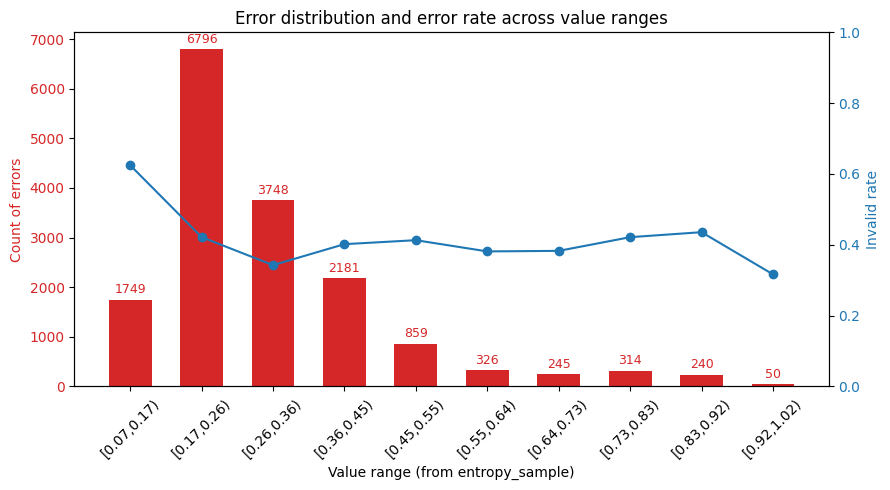

In [99]:
i=2

entropy_sample = total_entropy[:, i]
plot_entropy_distribution(entropy_sample, correct_ratio)

In [64]:
correct_ratio.shape

torch.Size([40315])

In [59]:
num_invalid = []
for i in range(16):
    log_probs_sample = total_log_probs[:, i]
    entropy_sample = total_entropy[:, i]
 
    values, idx = torch.sort(entropy_sample, descending=True)
    idx_1k = idx[18000:22000]
    values_1k = values[18000:22000]
    correct_ratio_1k = correct_ratio[idx_1k]
    invalid_num_correct = torch.sum(correct_ratio_1k==1) 
    invalid_num_incorrect = torch.sum(correct_ratio_1k==0)
    num_invalid.append(invalid_num_correct + invalid_num_incorrect)
    print(i, f"invalid_num_correct: {invalid_num_correct}, invalid_num_incorrect: {invalid_num_incorrect}")

0 invalid_num_correct: 382, invalid_num_incorrect: 994
1 invalid_num_correct: 423, invalid_num_incorrect: 916
2 invalid_num_correct: 361, invalid_num_incorrect: 922
3 invalid_num_correct: 378, invalid_num_incorrect: 940
4 invalid_num_correct: 365, invalid_num_incorrect: 938
5 invalid_num_correct: 356, invalid_num_incorrect: 956
6 invalid_num_correct: 412, invalid_num_incorrect: 888
7 invalid_num_correct: 375, invalid_num_incorrect: 929
8 invalid_num_correct: 365, invalid_num_incorrect: 989
9 invalid_num_correct: 380, invalid_num_incorrect: 919
10 invalid_num_correct: 398, invalid_num_incorrect: 961
11 invalid_num_correct: 379, invalid_num_incorrect: 943
12 invalid_num_correct: 378, invalid_num_incorrect: 948
13 invalid_num_correct: 370, invalid_num_incorrect: 951
14 invalid_num_correct: 359, invalid_num_incorrect: 908
15 invalid_num_correct: 364, invalid_num_incorrect: 980


In [ ]:
num_invalid = []
for i in range(16):
    log_probs_sample = total_log_probs[:, i]
    entropy_sample = total_entropy[:, i]
 
    values, idx = torch.sort(entropy_sample, descending=True)
    idx_1k = idx[:4000]
    values_1k = values[:4000]
    correct_ratio_1k = correct_ratio[idx_1k]
    invalid_num_correct = torch.sum(correct_ratio_1k==1) 
    invalid_num_incorrect = torch.sum(correct_ratio_1k==0)
    num_invalid.append(invalid_num_correct + invalid_num_incorrect)
    print(i, f"invalid_num_correct: {invalid_num_correct}, invalid_num_incorrect: {invalid_num_incorrect}")

0 invalid_num_correct: 80, invalid_num_incorrect: 1543
1 invalid_num_correct: 73, invalid_num_incorrect: 1549
2 invalid_num_correct: 72, invalid_num_incorrect: 1526
3 invalid_num_correct: 70, invalid_num_incorrect: 1513
4 invalid_num_correct: 74, invalid_num_incorrect: 1537
5 invalid_num_correct: 58, invalid_num_incorrect: 1504
6 invalid_num_correct: 78, invalid_num_incorrect: 1526
7 invalid_num_correct: 81, invalid_num_incorrect: 1499
8 invalid_num_correct: 64, invalid_num_incorrect: 1558
9 invalid_num_correct: 64, invalid_num_incorrect: 1534
10 invalid_num_correct: 86, invalid_num_incorrect: 1581
11 invalid_num_correct: 83, invalid_num_incorrect: 1533
12 invalid_num_correct: 89, invalid_num_incorrect: 1546
13 invalid_num_correct: 84, invalid_num_incorrect: 1496
14 invalid_num_correct: 77, invalid_num_incorrect: 1528
15 invalid_num_correct: 75, invalid_num_incorrect: 1535


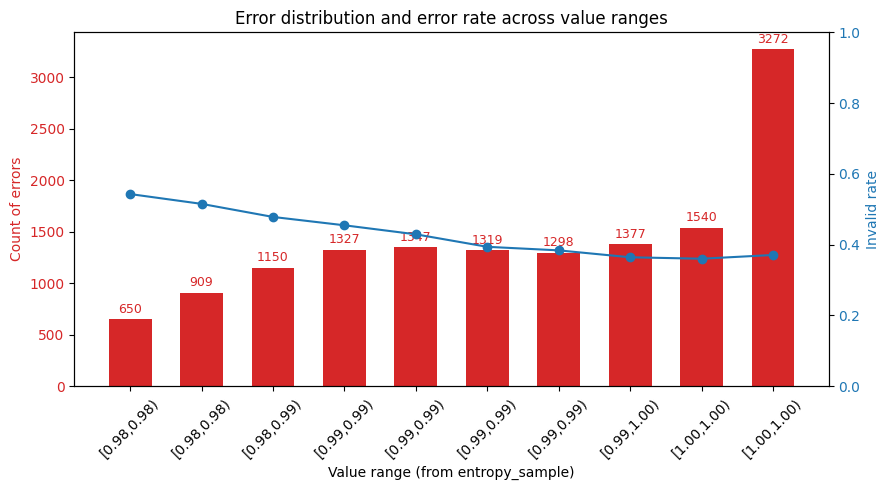

In [108]:
i=0
log_probs_sample = total_log_probs[:, i]
s_log_probs = torch.exp(log_probs_sample)
mu = torch.mean(s_log_probs)
scores = 1 - (s_log_probs - mu) ** 2
plot_entropy_distribution(scores, correct_ratio, 0.98)

In [55]:
num_invalid = []
for i in range(16):
    log_probs_sample = total_log_probs[:, i]
    entropy_sample = total_entropy[:, i]
    log_probs_sample.shape
    s_log_probs = torch.exp(log_probs_sample)
    mu = torch.mean(s_log_probs)
    scores = 1 - (s_log_probs - mu) ** 2
    values, idx = torch.sort(scores, descending=True)
    idx_1k = idx[:4000]
    values_1k = values[:4000]
    correct_ratio_1k = correct_ratio[idx_1k]
    invalid_num_correct = torch.sum(correct_ratio_1k==1) 
    invalid_num_incorrect = torch.sum(correct_ratio_1k==0)
    num_invalid.append(invalid_num_correct + invalid_num_incorrect)
    print(i, f"invalid_num_correct: {invalid_num_correct}, invalid_num_incorrect: {invalid_num_incorrect}")

0 invalid_num_correct: 225, invalid_num_incorrect: 1313
1 invalid_num_correct: 205, invalid_num_incorrect: 1228
2 invalid_num_correct: 216, invalid_num_incorrect: 1301
3 invalid_num_correct: 203, invalid_num_incorrect: 1296
4 invalid_num_correct: 219, invalid_num_incorrect: 1294
5 invalid_num_correct: 214, invalid_num_incorrect: 1266
6 invalid_num_correct: 210, invalid_num_incorrect: 1250
7 invalid_num_correct: 231, invalid_num_incorrect: 1290
8 invalid_num_correct: 213, invalid_num_incorrect: 1272
9 invalid_num_correct: 216, invalid_num_incorrect: 1260
10 invalid_num_correct: 244, invalid_num_incorrect: 1215
11 invalid_num_correct: 192, invalid_num_incorrect: 1293
12 invalid_num_correct: 207, invalid_num_incorrect: 1292
13 invalid_num_correct: 222, invalid_num_incorrect: 1279
14 invalid_num_correct: 202, invalid_num_incorrect: 1284
15 invalid_num_correct: 224, invalid_num_incorrect: 1288


In [37]:
sum(num_invalid)/16

tensor(1491.5000)

In [45]:
num_invalid = torch.tensor(num_invalid, dtype=torch.float32)
torch.std(num_invalid)


tensor(26.7407)

In [58]:
num_invalid = []
for i in range(16):
    log_probs_sample = total_log_probs[:, i]
    entropy_sample = total_entropy[:, i]
    log_probs_sample.shape
    s_log_probs = torch.exp(log_probs_sample)
    mu = torch.mean(s_log_probs)
    scores = 1 - (s_log_probs - mu) ** 2
    values, idx = torch.sort(scores, descending=True)
    idx_1k = idx[-4000:]
    values_1k = values[-4000:]
    correct_ratio_1k = correct_ratio[idx_1k]
    invalid_num_correct = torch.sum(correct_ratio_1k==1) 
    invalid_num_incorrect = torch.sum(correct_ratio_1k==0)
    num_invalid.append(invalid_num_correct + invalid_num_incorrect)
    print(i, f"invalid_num_correct: {invalid_num_correct}, invalid_num_incorrect: {invalid_num_incorrect}")

0 invalid_num_correct: 89, invalid_num_incorrect: 1533
1 invalid_num_correct: 80, invalid_num_incorrect: 1549
2 invalid_num_correct: 76, invalid_num_incorrect: 1524
3 invalid_num_correct: 78, invalid_num_incorrect: 1489
4 invalid_num_correct: 88, invalid_num_incorrect: 1487
5 invalid_num_correct: 75, invalid_num_incorrect: 1498
6 invalid_num_correct: 92, invalid_num_incorrect: 1507
7 invalid_num_correct: 87, invalid_num_incorrect: 1473
8 invalid_num_correct: 75, invalid_num_incorrect: 1554
9 invalid_num_correct: 74, invalid_num_incorrect: 1513
10 invalid_num_correct: 101, invalid_num_incorrect: 1555
11 invalid_num_correct: 84, invalid_num_incorrect: 1520
12 invalid_num_correct: 98, invalid_num_incorrect: 1544
13 invalid_num_correct: 88, invalid_num_incorrect: 1481
14 invalid_num_correct: 89, invalid_num_incorrect: 1500
15 invalid_num_correct: 88, invalid_num_incorrect: 1503


In [57]:
idx_target = idx[:4000]
target_data = data[idx_target]
from datasets import Dataset
target_data = Dataset.from_dict(target_data)
target_data.to_parquet('/nfsdata/yhe/verl/data/qwen-math/deepscaler/train_generation_4k_ufo.parquet')

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

128076238

In [51]:
values_1k = 1 - torch.abs(values_1k - 0.5)

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

corr1 = pearsonr(correct_ratio_1k, values_1k)
corr1

PearsonRResult(statistic=0.00018911809, pvalue=0.9952342963871487)

In [113]:
data[0]['prompt']

[{'content': 'The operation $\\otimes$ is defined for all nonzero numbers by $a \\otimes b = \\frac{a^{2}}{b}$. Determine $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$.',
  'role': 'user'}]

In [ ]:
path = '/nfsdata/yhe/DR_SAF/data/aime1983-2023.parquet'
data = load_data(path)
data[0]['prompt']


Generating train split: 0 examples [00:00, ? examples/s]

[{'content': "Let $x$ , $y$ and $z$ all exceed $1$ and let $w$ be a positive number such that $\\log_xw=24$ , $\\log_y w = 40$ and $\\log_{xyz}w=12$ . Find $\\log_zw$ . Let's think step by step and output the final answer within \\boxed{}.",
  'role': 'user'}]

In [118]:
len(data)

933

In [115]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/nfsdata/yhe/models/DeepSeek-R1-Distill-Qwen-1.5B')
prompt = data[0]['prompt']
tokenizer.apply_chat_template(prompt, add_generation_prompt=True, tokenize=False)

'<｜begin▁of▁sentence｜><｜User｜>The operation $\\otimes$ is defined for all nonzero numbers by $a \\otimes b = \\frac{a^{2}}{b}$. Determine $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$.<｜Assistant｜><think>\n'